In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 
drv, _ = which_computer()

In [2]:
# conditions for 95th HoLo per Alfredo email
Hs=2.6139
Tp=9.3503
Bf = [.052, .103, .153]

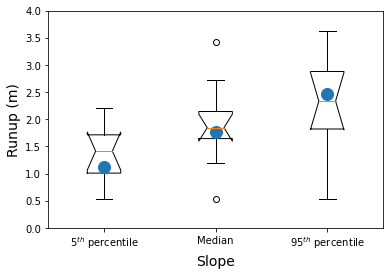

In [11]:
# Variation due to slopes
R2_slopes = np.empty((len(func_list),3))
R2_S06 = np.empty((3))
for j, sl in enumerate( Bf ):
    R2_S06[j]=S06(Hs, calc_L0(Tp),sl)
    for i, item in enumerate( func_list):
        cmd = "R2_slopes[i][j]={}({}, {}, {})".format(item, Hs, calc_L0(Tp), sl)
        # print(cmd)
        exec(cmd)

#plt.title('95th percentile H_s and T_p')
plt.boxplot(R2_slopes, notch=True)
plt.ylim([0, 4.])
plt.plot([1,2,3],R2_S06,'o',markersize=12) # Stockdon
plt.ylabel('Runup (m)', fontsize=14)

plt.xticks([1,2,3], [r'5$^{th}$ percentile','Median',r'95$^{th}$ percentile'])
plt.xlabel('Slope',fontsize=14)
plt.savefig(drv+'crs/proj/2022_Runup/HoM_ten_equations_boxplot.png', dpi=200)
plt.savefig(drv+'crs/proj/2022_Runup/HoM_ten_equations_boxplot.svg', dpi=200)

In [ ]:
print("95 low")
stat_summary(R2_slopes[:,0], iprint=True)
print("median")
stat_summary(R2_slopes[:,1], iprint=True)
print("95 high")
stat_summary(R2_slopes[:,2], iprint=True)